'''

We appreciated your help in stepping in during a bit of an exigent situation. We have a bit calmer of a task for you and one suited to a "Sun Devil." We have some basic crime data for Phoenix and we need to make better sense of it. We want to know where different kinds of crimes are occurring, in which areas crime is growing fastest (or dropping fastest), and whether certain crimes are more common in certain areas of the city. Basically, we don't need maps or anything at this stage, just some data grouped by location (either the type of location or the zip codes) and some trend data.

I mean, if you have the time for a bit of a challenge, we would love for you to bring in some other data to help draw a better picture around this. Are there some factors that affect the crime rate? If there are, we could see if there were ways to see where crime was more likely. We might even ask you to head up our new Pre-Crime unit in the Valley.

'''

*For this task, we want to:*

Use dataset: https://www.kaggle.com/datasets/mariapushkareva/phoenix-crime-data

Grouping crimes by location type or by zip code (or groups of zip codes).

Looking at types of crimes and where they are most common.

Find our which areas have the fastest growing and shrinking crime rates.

Grouping crimes by violent and non-violent crimes.

THEN

Add:

Draw an additional data source and see how it intersects with the crime data. 
Produce at least one scatter plot and one bar chart

Merge dataset: https://www.zip-codes.com/city/az-phoenix.asp#avgincome

In [1]:
#import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#load data
file_path = r'C:\Users\denee\Desktop\Homework\crime-data_crime-data_crimestat.csv'

# Specify the data types  
df = pd.read_csv(file_path)
df.head()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,GRID
0,198181008285,1/20/2023 0:00,NaN,BURGLARY,60XX S 11TH ST,85042.0,SINGLE FAMILY HOUSE,AC29
1,198282025394,6/25/2023 0:00,6/25/2023 0:00,LARCENY-THEFT,16XX N BLACK CANYON AC,85009.0,PARKING LOT,BD23B
2,198282029471,6/24/2023 0:00,6/24/2023 0:00,BURGLARY,5XX W CAMELBACK RD,85013.0,SPECIALTY STORE,BI27
3,198282030338,6/25/2023 0:00,NaN,LARCENY-THEFT,4XX N 17TH AVE,85007.0,SINGLE FAMILY HOUSE,BB25
4,198282030737,6/25/2023 0:00,6/25/2023 0:00,LARCENY-THEFT,48XX E BRILL ST,85008.0,SINGLE FAMILY HOUSE,BC39


Grouping crimes by location type or by zip code (or groups of zip codes).

In [3]:
#Grouping crimes by zip code (or groups of zip codes).
crime_count_by_zip = df.groupby(['ZIP', 'PREMISE TYPE']).size()

# Print the result
print(crime_count_by_zip)

ZIP      PREMISE TYPE                       
85003.0  ABANDONED/CONDEMNED STRUCTURE             3
         AIRPORT                                   3
         ALLEY                                    39
         APARTMENT                              1094
         ARENA / STADIUM / CONVENTION CENTER      10
                                                ... 
85396.0  SINGLE FAMILY HOUSE                       1
         SPECIALTY STORE                           2
         STREET / ROADWAY / ALLEY / SIDEWALK       3
         STREET / ROADWAY / SIDEWALK               1
         VEHICLE                                   2
Length: 4084, dtype: int64


Looking at types of crimes and where they are most common.

In [4]:
# Group by 'UCR CRIME CATEGORY' and then 'PREMISE TYPE'
grouped = df.groupby(['UCR CRIME CATEGORY', 'PREMISE TYPE'])

# Count the occurrences of crime in each group
crime_counts = grouped.size()

# Convert the series to a df
crime_counts_df = crime_counts.reset_index(name='count')

# Sort the df by CRIME CATEGORY in descending order
sorted_crime_counts = crime_counts_df.sort_values(['UCR CRIME CATEGORY', 'count'], ascending=[True, False])

# Drop duplicates, keeping the most frequent for each CRIME CATEGORY'
most_frequent_premise = sorted_crime_counts.drop_duplicates(subset=['UCR CRIME CATEGORY'])

print(most_frequent_premise)

                        UCR CRIME CATEGORY         PREMISE TYPE  count
5                       AGGRAVATED ASSAULT            APARTMENT  11888
148                                  ARSON  SINGLE FAMILY HOUSE    503
225                               BURGLARY  SINGLE FAMILY HOUSE  28352
321                           DRUG OFFENSE              VEHICLE   7709
328                          LARCENY-THEFT            APARTMENT  25767
426                    MOTOR VEHICLE THEFT            APARTMENT  13748
543  MURDER AND NON-NEGLIGENT MANSLAUGHTER  SINGLE FAMILY HOUSE    241
617                                   RAPE  SINGLE FAMILY HOUSE   2349
684                                ROBBERY          PARKING LOT   3131


Find our which areas have the fastest growing and shrinking crime rates.

In [5]:
#Convert "OCCURRED ON" to a date time column in pandas
df['OCCURRED ON'] = pd.to_datetime(df['OCCURRED ON'])

# Extract the year (or you can choose month, quarter, etc.)
df['Year'] = df['OCCURRED ON'].dt.year

In [6]:
# Group by ZIP and Year, then count the number of crimes
crime_counts = df.groupby(['ZIP', 'Year']).size().reset_index(name='Count')

In [7]:
# Pivot so that Years is a column and ZIP is rows
pivot_crime_counts = crime_counts.pivot(index='ZIP', columns='Year', values='Count')

In [8]:
# Calculate the year-over-year difference in crime counts by ZIP
pivot_crime_counts = pivot_crime_counts.diff(axis=1)

# Find the ZIP with the greatest increase in crime for each year
max_increase_zip = pivot_crime_counts.idxmax()

print(max_increase_zip)

Year
2015.0        NaN
2016.0    85015.0
2017.0    85043.0
2018.0    85007.0
2019.0    85041.0
2020.0    85008.0
2021.0    85029.0
2022.0    85004.0
2023.0    85021.0
2024.0    85260.0
dtype: float64


Here we see that the zips 85021 and 85260 have been having the greatest increase in crime in the recent years (2023-2024)

Now, lets group crimes by violent and non-violent crimes.

In [9]:
print(df['UCR CRIME CATEGORY'].unique())

['BURGLARY' 'LARCENY-THEFT' 'MOTOR VEHICLE THEFT' 'ROBBERY' 'ARSON'
 'AGGRAVATED ASSAULT' 'RAPE' 'DRUG OFFENSE'
 'MURDER AND NON-NEGLIGENT MANSLAUGHTER']


We see that the values aggrevated assault, rage, murder, and arson can be classified as 'voilent crime', lets have the other values classified as 'non-voilent crimes' in a new binary column in our dataset

In [10]:
violent_crimes = ['AGGRAVATED ASSAULT', 'RAPE', 'MURDER AND NON-NEGLIGENT MANSLAUGHTER', 'ARSON']
df['VIOLENT_CRIME'] = np.where(df['UCR CRIME CATEGORY'].isin(violent_crimes), 1, 0)

In [11]:
# Group by ZIP, Year, and Violent Crime status, and then count the number of crimes
crime_counts = df.groupby(['ZIP', 'Year', 'VIOLENT_CRIME']).size().reset_index(name='Count')

In [12]:
# Pivot the table with ZIP and Violent Crime as rows and Year as columns
pivot_crime_counts = crime_counts.pivot_table(index=['ZIP', 'VIOLENT_CRIME'], columns='Year', values='Count')

In [13]:
# Calculate the year-over-year change in crime count
pivot_crime_counts = pivot_crime_counts.diff(axis=1)

In [14]:
# Reset index 
pivot_crime_counts_reset = pivot_crime_counts.reset_index()

In [15]:
# Filter for violent and non-violent crimes separately and find the ZIP code with the greatest increase
max_increase_violent = pivot_crime_counts_reset[pivot_crime_counts_reset['VIOLENT_CRIME'] == 1].set_index('ZIP').idxmax(axis=1)
max_increase_non_violent = pivot_crime_counts_reset[pivot_crime_counts_reset['VIOLENT_CRIME'] == 0].set_index('ZIP').idxmax(axis=1)

In [16]:
print("ZIP codes with the greatest increase in violent crimes:")
print(max_increase_violent)
print("\nZIP codes with the greatest increase in non-violent crimes:")
print(max_increase_non_violent)

ZIP codes with the greatest increase in violent crimes:
ZIP
85003.0           2016.0
85004.0           2016.0
85006.0           2016.0
85007.0           2016.0
85008.0           2016.0
               ...      
85388.0    VIOLENT_CRIME
85390.0    VIOLENT_CRIME
85392.0    VIOLENT_CRIME
85395.0    VIOLENT_CRIME
85396.0    VIOLENT_CRIME
Length: 98, dtype: object

ZIP codes with the greatest increase in non-violent crimes:
ZIP
85003.0           2016.0
85004.0           2016.0
85006.0           2016.0
85007.0           2016.0
85008.0           2016.0
               ...      
85383.0           2023.0
85388.0    VIOLENT_CRIME
85392.0           2019.0
85395.0           2022.0
85396.0           2018.0
Length: 111, dtype: object


Now using Phoenix's average household income by year, lets analyze the crime rates per year by average household income

In [17]:
#load in additional data
file_path = r'C:\Users\denee\Desktop\Homework\IncomeOverTime_AllZIPsIn_AZ_CityFile.csv'

# Specify the data types  
df_income = pd.read_csv(file_path)
df_income.head()

,Year,Household Income,Family Income,Nonfamily Income,Male Income,Female Income
0,2011,50964,59619,37729,45530,37626
1,2012,49847,57971,36667,45977,37959
2,2013,49540,57955,36239,45463,38724
3,2014,49829,58991,36020,45819,38893
4,2015,50421,59555,35757,45896,38343


In [18]:
#merge the two columns together
merged_df = df.merge(df_income, on='Year', how='inner')

In [19]:
merged_df.head()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,GRID,Year,VIOLENT_CRIME,Household Income,Family Income,Nonfamily Income,Male Income,Female Income
0,201061951901,2016-03-10 11:03:00,3/10/2016 11:03,LARCENY-THEFT,1XX E ELWOOD ST,85040.0,NaN,AG28,2016.0,0,52034,62623,36254,46358,38777
1,201680000015,2016-01-01 20:00:00,NaN,LARCENY-THEFT,150XX N CAVE CREEK RD,85022.0,RESTAURANT,DE32,2016.0,0,52034,62623,36254,46358,38777
2,201680000023,2016-01-01 01:38:00,1/1/2016 1:40,LARCENY-THEFT,58XX N 16TH ST,85016.0,BAR / LOUNG / NIGHT CLUB,CA31B,2016.0,0,52034,62623,36254,46358,38777
3,201680000025,2016-01-02 00:00:00,1/2/2016 13:00,LARCENY-THEFT,93XX W MCDOWELL RD,85037.0,PARKING LOT,BD06,2016.0,0,52034,62623,36254,46358,38777
4,201680000027,2016-01-02 15:00:00,NaN,LARCENY-THEFT,53XX E DEER VALLEY DR,85054.0,CONDO / TOWNHOUSE,ED40,2016.0,0,52034,62623,36254,46358,38777


Lets look at the count of voilent crime per average household income

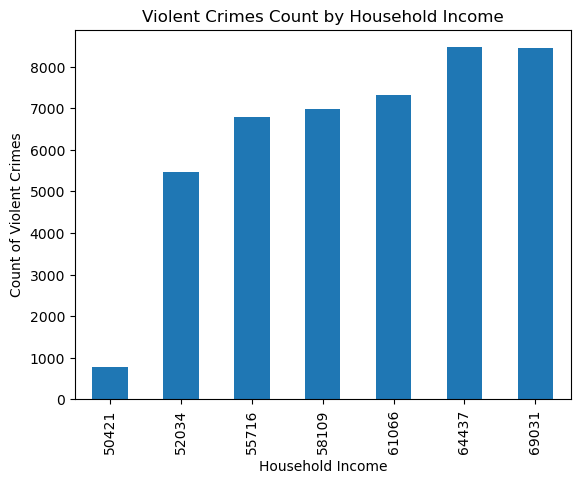

In [20]:
# Filter for VIOLENT_CRIME == 1
violent_crimes = merged_df[merged_df['VIOLENT_CRIME'] == 1]

# Group by 'Household Income'
violent_crime_counts = violent_crimes.groupby('Household Income').size()

# Plot
violent_crime_counts.plot(kind='bar')
plt.xlabel('Household Income')
plt.ylabel('Count of Violent Crimes')
plt.title('Violent Crimes Count by Household Income')
plt.show()

How about a side by side of voilent and non-voilent crime?

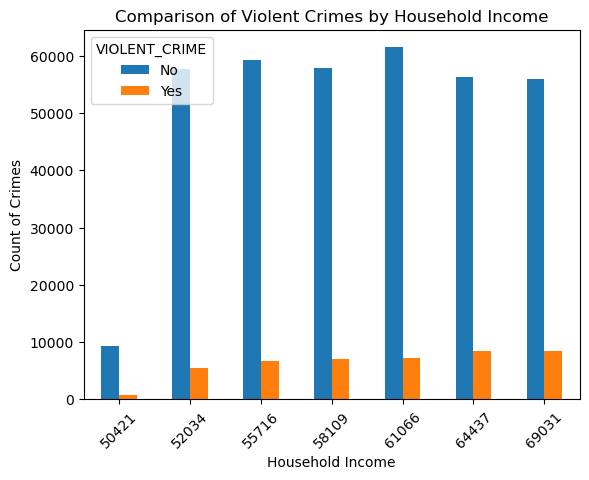

In [21]:
grouped_data = merged_df.groupby(['Household Income', 'VIOLENT_CRIME']).size().unstack()

# Plotting
grouped_data.plot(kind='bar', stacked=False)
plt.xlabel('Household Income')
plt.ylabel('Count of Crimes')
plt.title('Comparison of Violent Crimes by Household Income')
plt.xticks(rotation=45)
plt.legend(title='VIOLENT_CRIME', labels=['No', 'Yes'])
plt.show()

Now lets look at median household income and crime as a line graph

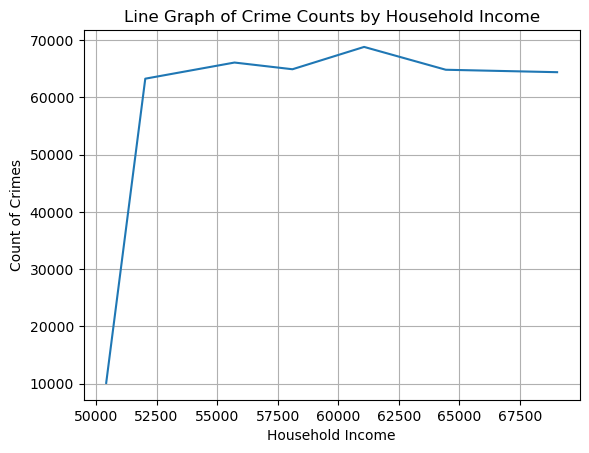

In [27]:
# Group by 'Household Income'
grouped_data = merged_df.groupby('Household Income').size()

# Plot
grouped_data.plot(kind='line')
plt.xlabel('Household Income')
plt.ylabel('Count of Crimes')
plt.title('Line Graph of Crime Counts by Household Income')
plt.grid(True)
plt.show()

Lastly, lets look at a scatterplot of voilent crime vs. non-voilent crime

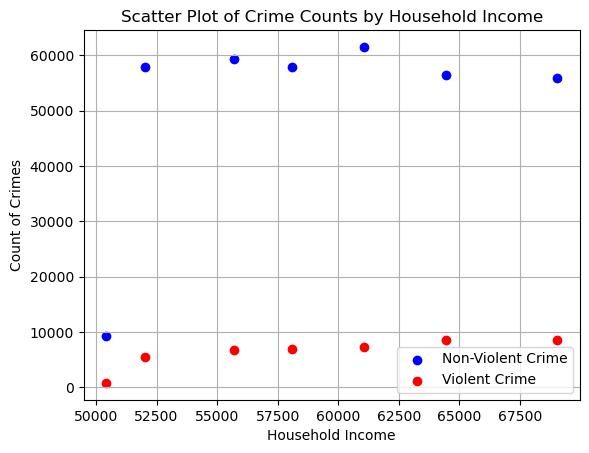

In [28]:
# Group by 'Household Income' and 'VIOLENT_CRIME', then count
grouped_data = merged_df.groupby(['Household Income', 'VIOLENT_CRIME']).size().reset_index(name='Count')

# Split the data into two parts
non_violent_crime = grouped_data[grouped_data['VIOLENT_CRIME'] == 0]
violent_crime = grouped_data[grouped_data['VIOLENT_CRIME'] == 1]

# Plotting
plt.scatter(non_violent_crime['Household Income'], non_violent_crime['Count'], color='blue', label='Non-Violent Crime')
plt.scatter(violent_crime['Household Income'], violent_crime['Count'], color='red', label='Violent Crime')

plt.xlabel('Household Income')
plt.ylabel('Count of Crimes')
plt.title('Scatter Plot of Crime Counts by Household Income')
plt.legend()
plt.grid(True)
plt.show()

One more, lets look at total voilent crimes per average household income

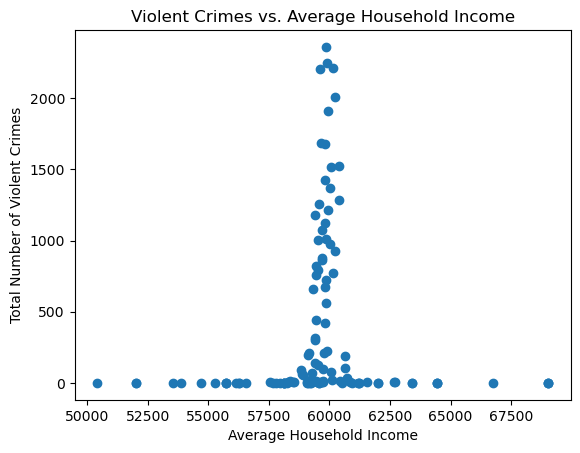

In [31]:
# Aggregate data
agg_data = merged_df.groupby('ZIP').agg({
    'VIOLENT_CRIME': 'sum',  # Total number of violent crimes
    'Household Income': 'mean'  # Average household income
}).reset_index()

# Scatter plot
plt.scatter(agg_data['Household Income'], agg_data['VIOLENT_CRIME'])
plt.xlabel('Average Household Income')
plt.ylabel('Total Number of Violent Crimes')
plt.title('Violent Crimes vs. Average Household Income')
plt.show()